In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
#set raw data path
raw_data_path = '/Users/cresp1el/Documents/github_project/data/raw.csv'

# Read in the data into a pandas dataframe
df = pd.read_csv(raw_data_path)

#properties of data frame
[row_size, col_size ]= df.shape

#print properties of data frame   
print('The number of rows in the data frame is: ', row_size)
print('The number of columns in the data frame is: ', col_size)

The number of rows in the data frame is:  8198
The number of columns in the data frame is:  167


/var/folders/ws/rz9dhstn6hbcglgm5d7dxjdw0000gq/T/ipykernel_32255/2822184516.py:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_data_path)


In [64]:
# define a function to find the first column location with missing values in all rows in a data frame

def find_df_loc_with_missingvalue(input_df):

    ''' 
    
    function: 
        find the first column location with missing values in all rows in a data frame
        
    input variables: 
        input_df: data frame
    
    '''
    
    #check input is a data frame
    if not isinstance(input_df, pd.DataFrame):      
        raise TypeError("Input is not a data frame")                     
    
    #find first column index in data frame missing values in all rows, output is a string            
    idx_loc = input_df.isnull().all().idxmax()
    
    #find and pull out values of intergers found within a string, output is in a list    
    idx_loc =   [int(s) for s in idx_loc.split() if s.isdigit()]
    
    #index into the first element of the list to get the integer value of the column index
    idx_loc = idx_loc[0]
    
    #extract all columns up to the column with missing values in all rows and remove the first row of all columns
    output_df = input_df.iloc[:, :idx_loc]
    
    #delete the first row of all columns from the data frame
    output_df = output_df.iloc[2:,:]
    
    #delete variables that are no longer needed
    del input_df
        
    return idx_loc, output_df

In [65]:
#call function to find the first column location with missing values in all rows in a data frame
idx_loc, output_df = find_df_loc_with_missingvalue(df)

In [66]:
#find all strings and convert to float first
output_df = output_df.apply(pd.to_numeric, errors='coerce')

In [67]:
#pull out the first column, from the first row until the end of data frame assign it to a variable called 'time' as a numpy array of integers, 
time_s = output_df.iloc[1:8171,0].values

#pull out the second column and onwards from the data frame and assign it to a variable called 'data' as a numpy array
data_s = output_df.iloc[1:8171,1:].values

#define the output file path
output_file_path = '/Users/cresp1el/Documents/github_project/data/'

IndexError: index 42 is out of bounds for axis 1 with size 42

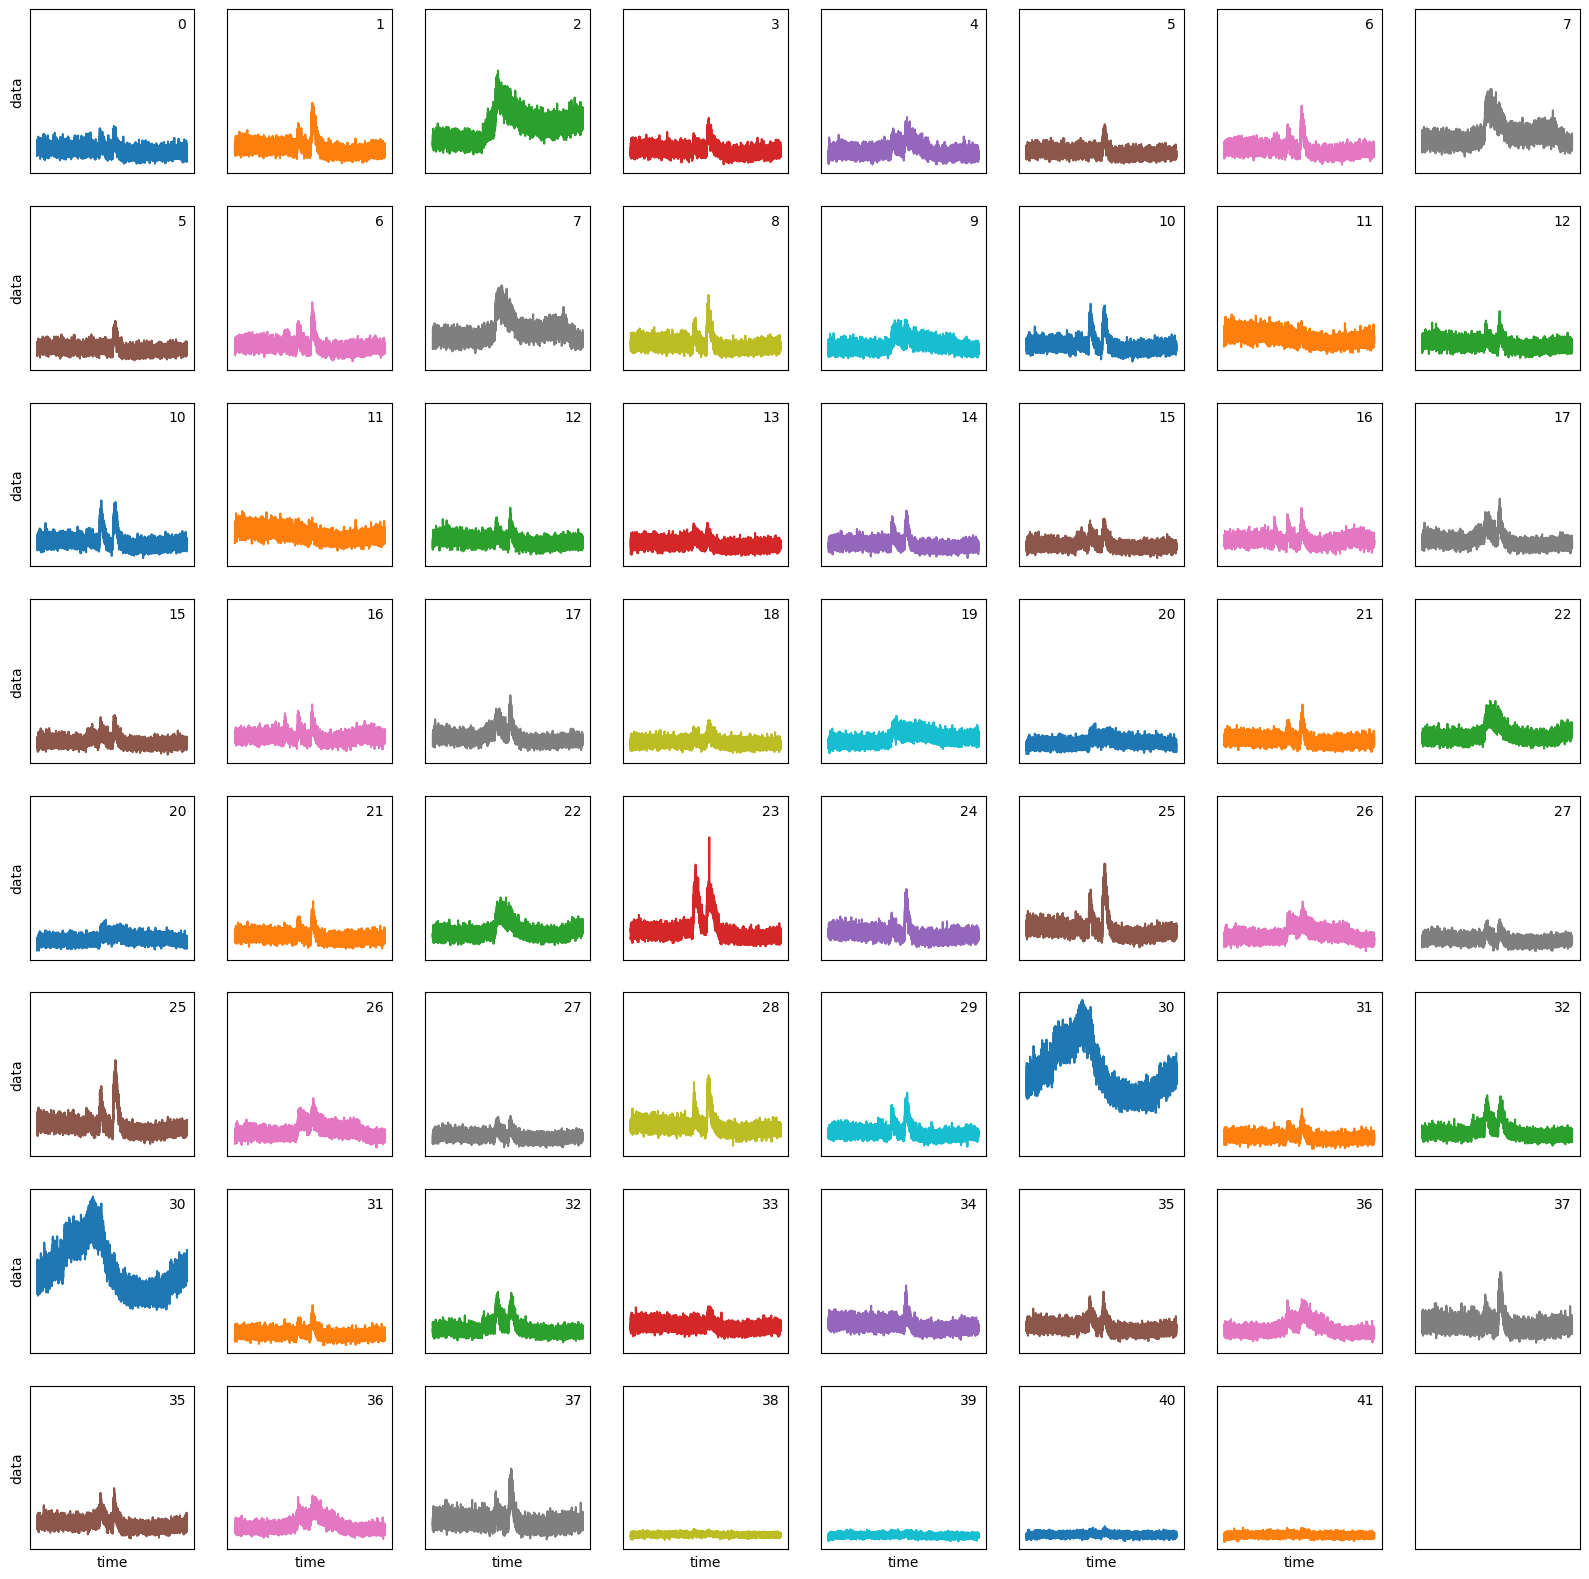

In [68]:
#plot data in grid with a shared x and y axis without any borders and labels, 
# place the column number on the top right corner of each plot and remove the plot title,
# plot each column in a different color 
# show the x and y axis labels only on the bottom left corner plot
# display the y axis
fig, ax = plt.subplots(8, 8, figsize=(20, 20), sharex=True, sharey=True)
for i in range(8):
    for j in range(8):
        ax[i, j].plot(time_s, data_s[:,i*5+j], color='C{}'.format(i*5+j))
        ax[i, j].set_title('')
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].text(0.95, 0.95, '{}'.format(i*5+j), transform=ax[i, j].transAxes, horizontalalignment='right', verticalalignment='top')
        if i == 7:
            ax[i, j].set_xlabel('time')
        if j == 0:
            ax[i, j].set_ylabel('data')

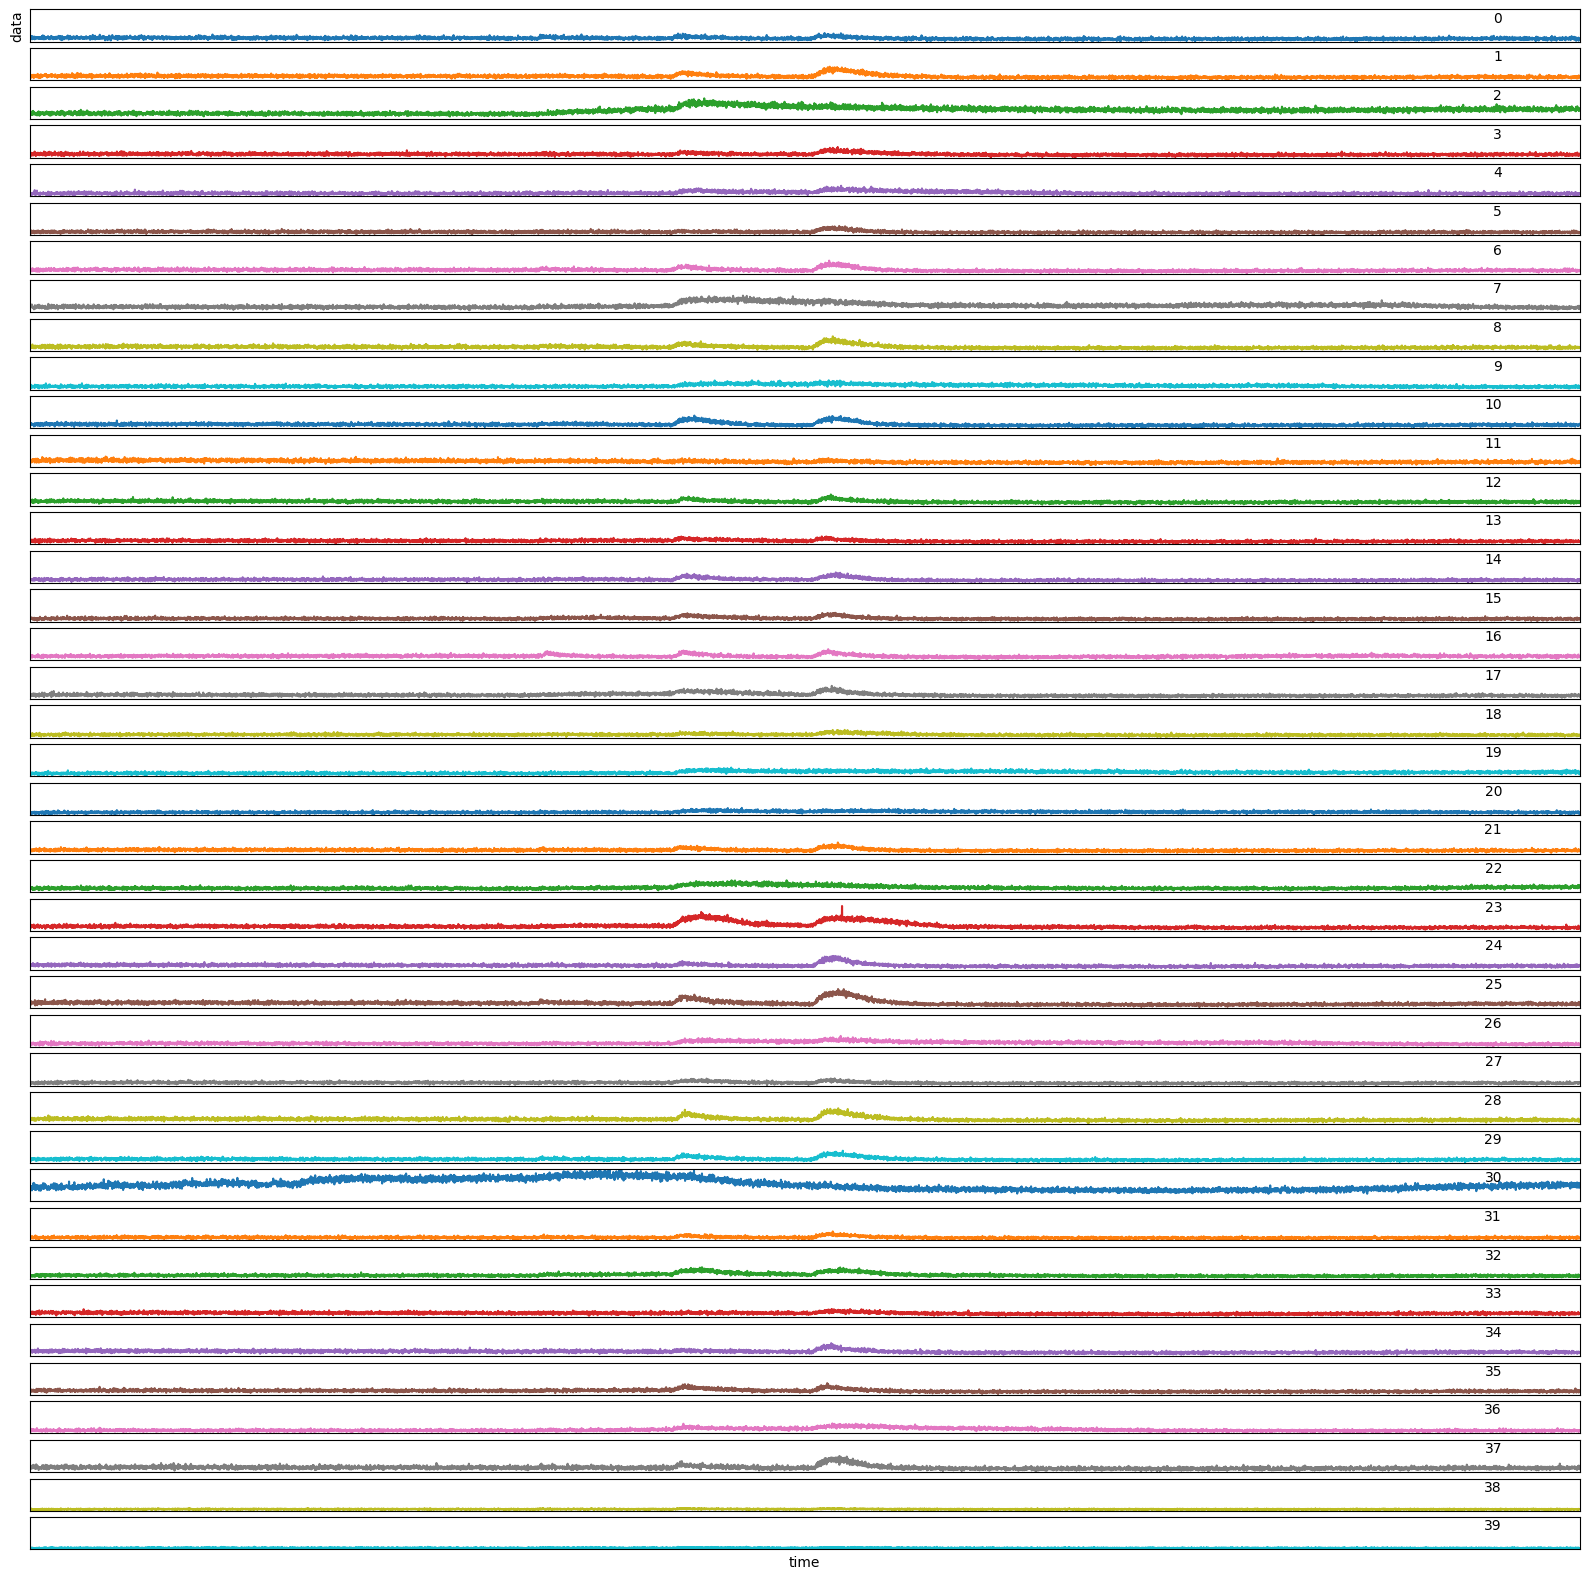

In [55]:
#plot each column in a stacked plot with a shared x axis without any borders and labels,
# place the column number on the top right corner of each plot and remove the plot title,
# show the x and y axis labels only on the bottom left corner plot
# display the y axis
# squeeze the x axis to fit the plot
# autoscale the x axis to fit the plot
fig, ax = plt.subplots(40, 1, figsize=(20, 20), sharex=True, sharey=True)
for i in range(40):
    ax[i].plot(time_s, data_s[:,i], color='C{}'.format(i))
    ax[i].set_title('')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].text(0.95, 0.95, '{}'.format(i), transform=ax[i].transAxes, horizontalalignment='right', verticalalignment='top')
    if i == 39:
        ax[i].set_xlabel('time')
    if i == 0:
        ax[i].set_ylabel('data')
    ax[i].margins(x=0, y=0)
    ax[i].autoscale(enable=True, axis='x', tight=True)

Text(0.5, 1.0, 'column 16')

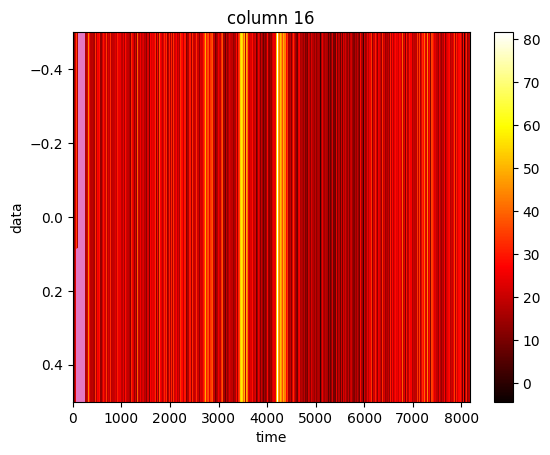

In [69]:
#plot column 16 only
plt.plot(time_s, data_s[:,16], color='C{}'.format(16))
plt.xlabel('time')
plt.ylabel('data')
plt.title('column 16')

#plot a heatmap spectrogram of column 16
# show color bar
# show x and y axis labels
# show plot title
plt.imshow(data_s[:,16].reshape(1,-1), cmap='hot', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xlabel('time')
plt.ylabel('data')
plt.title('column 16')




Text(0.5, 1.0, 'column 16')

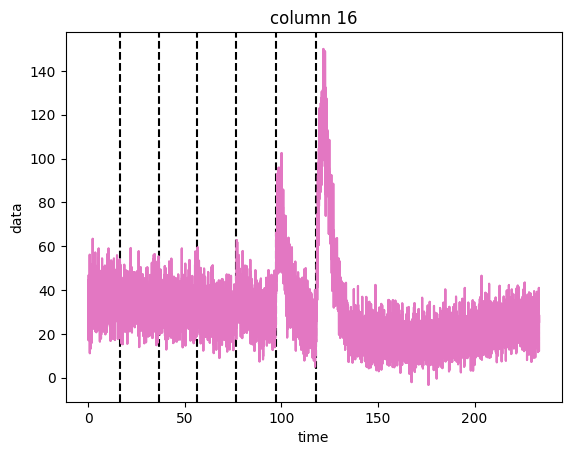

In [136]:
stim_on_frame = [573,1276,1979,2683,3393,4129]

#plot column 16 only with stimulus onsets marked as vertical lines
plt.plot(time_s, data_s[:,25], color='C{}'.format(16))
plt.xlabel('time')
plt.ylabel('data')
plt.title('column 16')
for i in range(len(stim_on_frame)):
    plt.axvline(x=time_s[stim_on_frame[i]], color='k', linestyle='--')
    




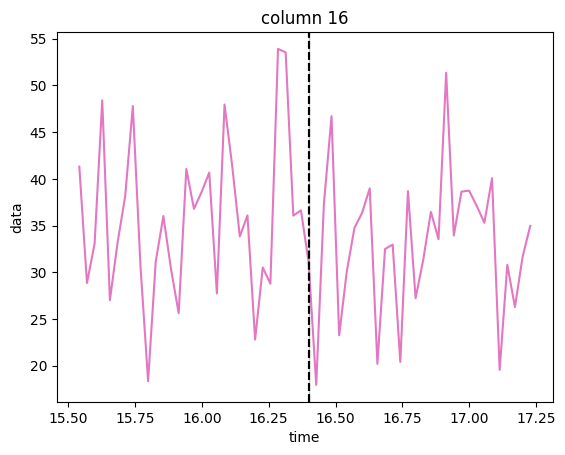

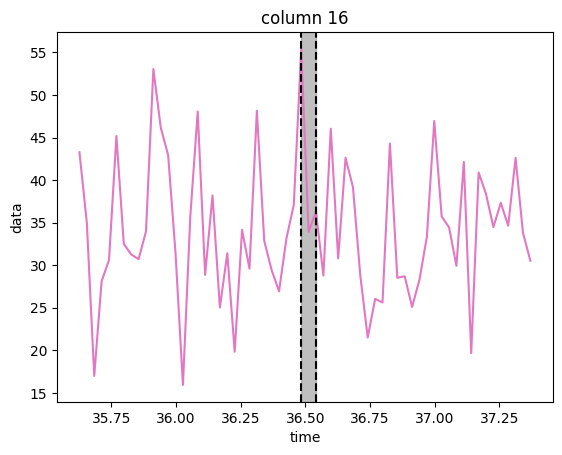

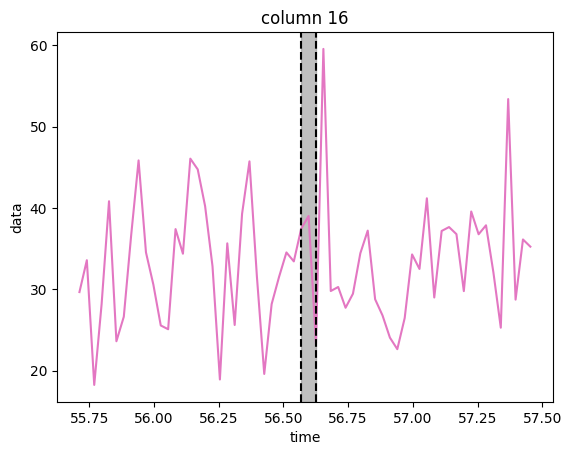

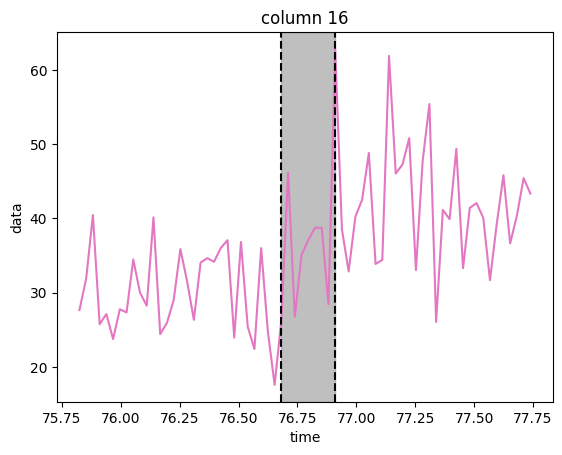

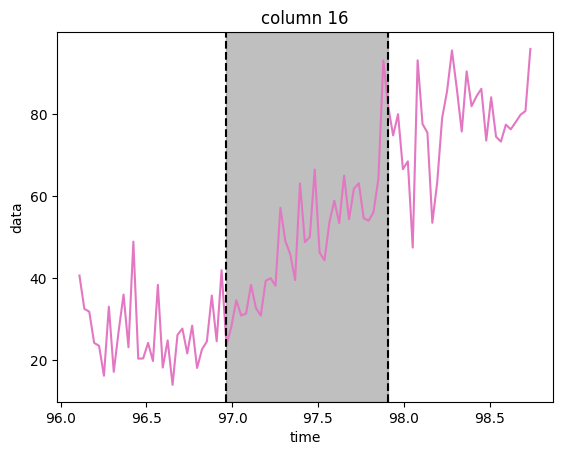

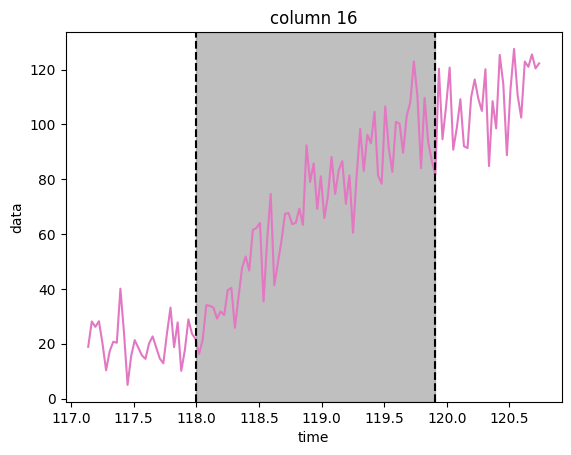

In [144]:
#create offset list from stim_on_frame 
stim_onset_frame = [573,1276,1979,2683,3393,4129]
stim_offset_frame = [573,1278,1981,2691,3426,4196]

#plot the first stimulation of column 16 only with stimulus_onset and stimulus_offset marked as vertical lines 
#only plot 30 frames before the first onset and 30 frames after the first offset
plt.plot(time_s[stim_onset_frame[0]-30:stim_offset_frame[0]+30], data_s[stim_onset_frame[0]-30:stim_offset_frame[0]+30,25], color='C{}'.format(16))
plt.xlabel('time')
plt.ylabel('data')
plt.title('column 16')
plt.axvline(x=time_s[stim_onset_frame[0]], color='k', linestyle='--')
plt.axvline(x=time_s[stim_offset_frame[0]], color='k', linestyle='--')
#add a shaded area to indicate the stimulation period
plt.axvspan(time_s[stim_onset_frame[0]], time_s[stim_offset_frame[0]], alpha=0.5, color='grey')
plt.show()

#repeat the above for the second stimulation
plt.plot(time_s[stim_onset_frame[1]-30:stim_offset_frame[1]+30], data_s[stim_onset_frame[1]-30:stim_offset_frame[1]+30,25], color='C{}'.format(16))
plt.xlabel('time')
plt.ylabel('data')
plt.title('column 16')
plt.axvline(x=time_s[stim_onset_frame[1]], color='k', linestyle='--')
plt.axvline(x=time_s[stim_offset_frame[1]], color='k', linestyle='--')
plt.axvspan(time_s[stim_onset_frame[1]], time_s[stim_offset_frame[1]], alpha=0.5, color='grey')
plt.show()

#repeat the above for the third stimulation
plt.plot(time_s[stim_onset_frame[2]-30:stim_offset_frame[2]+30], data_s[stim_onset_frame[2]-30:stim_offset_frame[2]+30,25], color='C{}'.format(16))
plt.xlabel('time')
plt.ylabel('data')
plt.title('column 16')
plt.axvline(x=time_s[stim_onset_frame[2]], color='k', linestyle='--')
plt.axvline(x=time_s[stim_offset_frame[2]], color='k', linestyle='--')
plt.axvspan(time_s[stim_onset_frame[2]], time_s[stim_offset_frame[2]], alpha=0.5, color='grey')
plt.show()

#repeat the above for the fourth stimulation
plt.plot(time_s[stim_onset_frame[3]-30:stim_offset_frame[3]+30], data_s[stim_onset_frame[3]-30:stim_offset_frame[3]+30,25], color='C{}'.format(16))
plt.xlabel('time')
plt.ylabel('data')
plt.title('column 16')
plt.axvline(x=time_s[stim_onset_frame[3]], color='k', linestyle='--')
plt.axvline(x=time_s[stim_offset_frame[3]], color='k', linestyle='--')
plt.axvspan(time_s[stim_onset_frame[3]], time_s[stim_offset_frame[3]], alpha=0.5, color='grey')
plt.show()

#repeat the above for the fifth stimulation
plt.plot(time_s[stim_onset_frame[4]-30:stim_offset_frame[4]+30], data_s[stim_onset_frame[4]-30:stim_offset_frame[4]+30,25], color='C{}'.format(16))
plt.xlabel('time')
plt.ylabel('data')
plt.title('column 16')
plt.axvline(x=time_s[stim_onset_frame[4]], color='k', linestyle='--')
plt.axvline(x=time_s[stim_offset_frame[4]], color='k', linestyle='--')
plt.axvspan(time_s[stim_onset_frame[4]], time_s[stim_offset_frame[4]], alpha=0.5, color='grey')
plt.show()

#repeat the above for the sixth stimulation
plt.plot(time_s[stim_onset_frame[5]-30:stim_offset_frame[5]+30], data_s[stim_onset_frame[5]-30:stim_offset_frame[5]+30,25], color='C{}'.format(16))
plt.xlabel('time')
plt.ylabel('data')
plt.title('column 16')
plt.axvline(x=time_s[stim_onset_frame[5]], color='k', linestyle='--')
plt.axvline(x=time_s[stim_offset_frame[5]], color='k', linestyle='--')
plt.axvspan(time_s[stim_onset_frame[5]], time_s[stim_offset_frame[5]], alpha=0.5, color='grey')
plt.show()

        
    
        

IndexError: index 42 is out of bounds for axis 1 with size 42

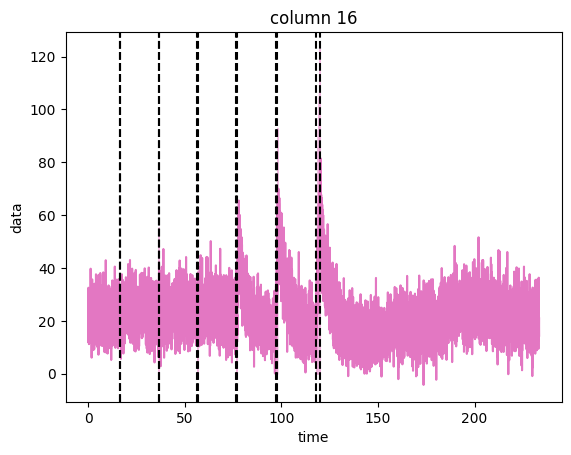

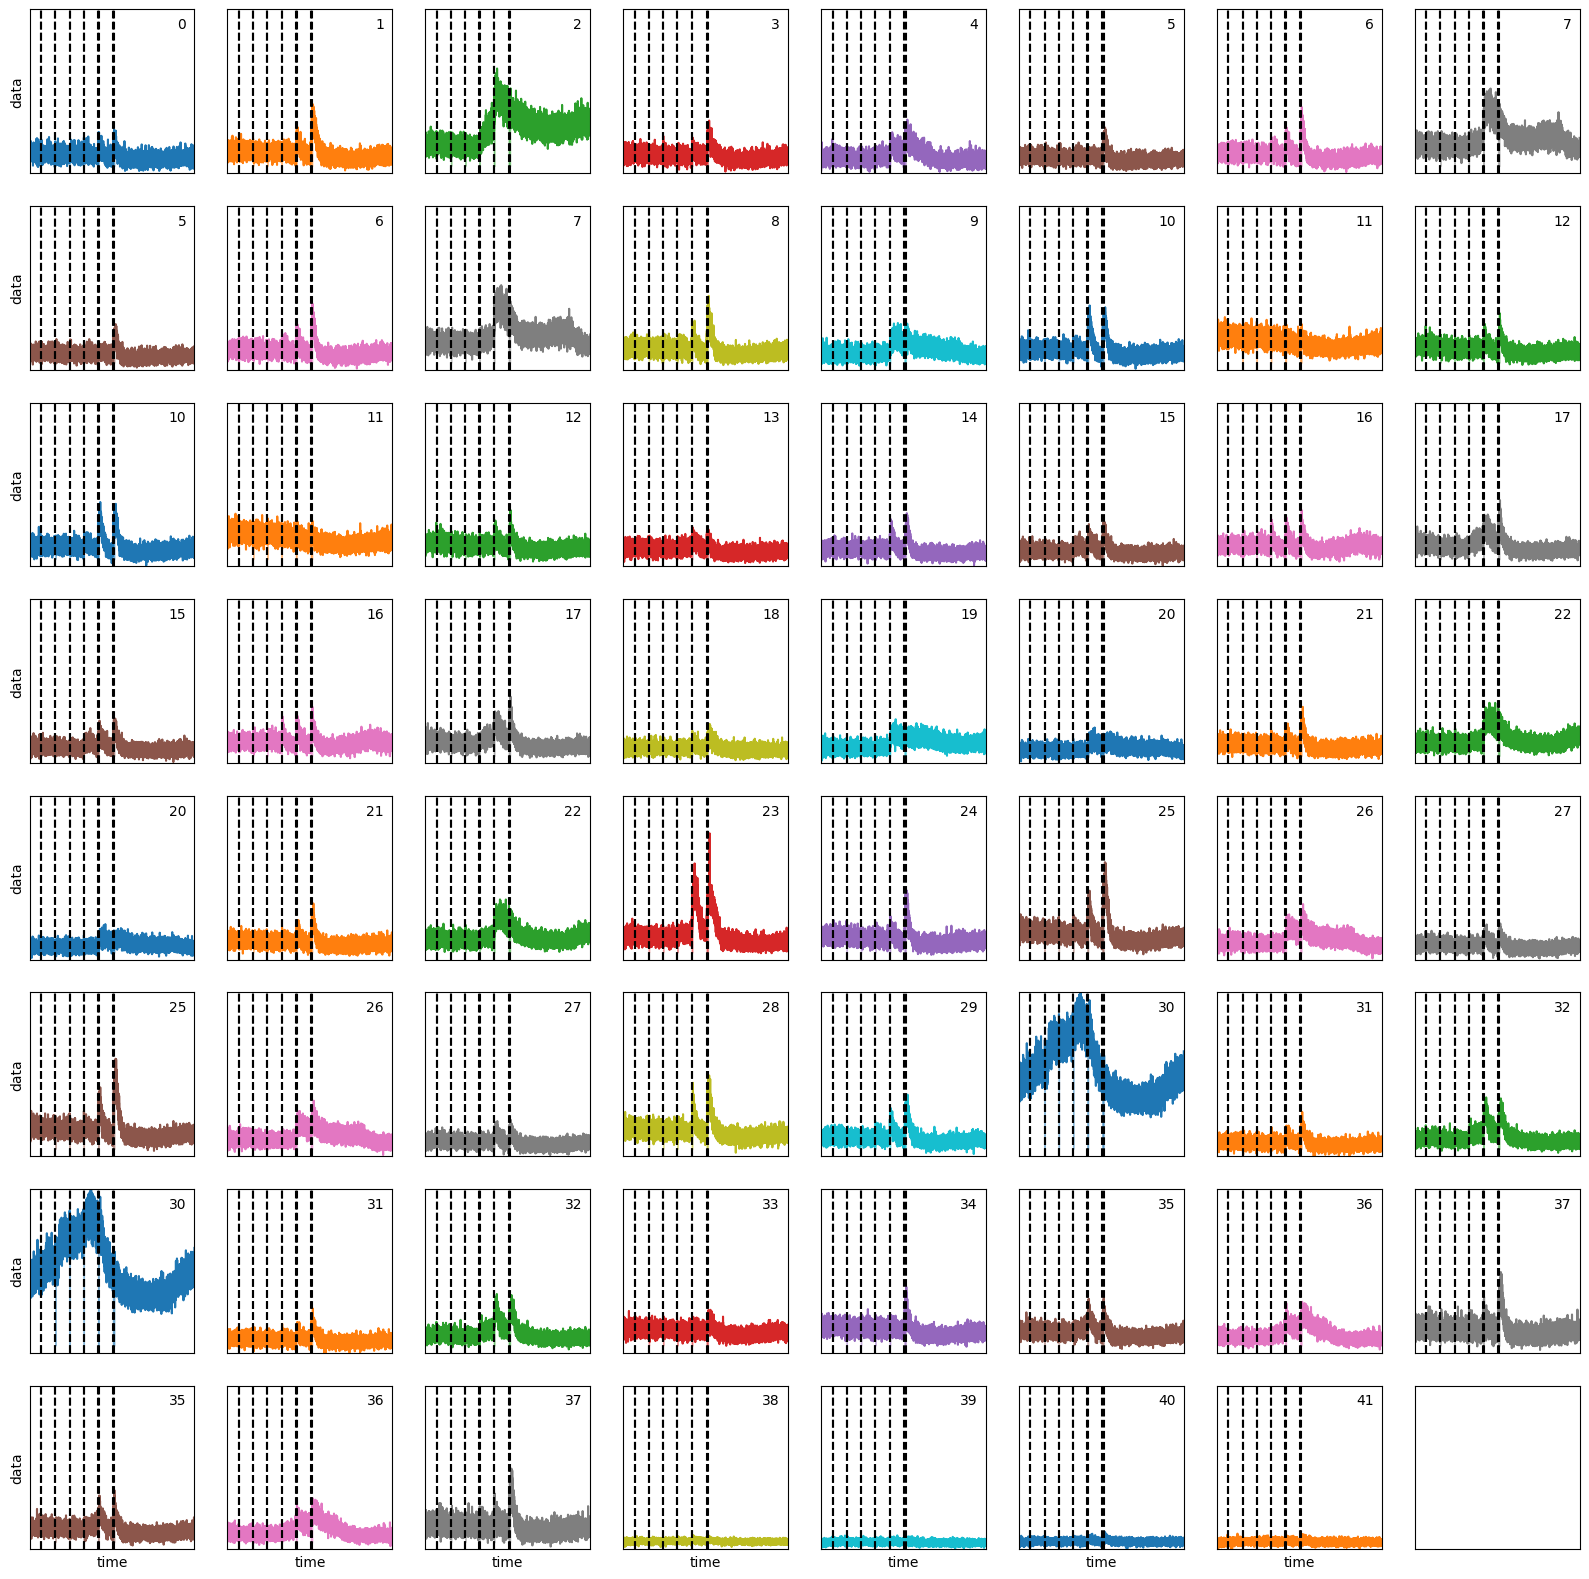

In [120]:
# stimulation windows 
# 1ms is 0.033 frames #this would not be detectable at 35.096Hz sampling rate
# 12ms is 0.4 frames
# 24ms is 0.8 frames

# 36ms is 1.27 frames  
# 60 ms is 2.11 frames
# 240ms is 8.44 frames
# 960ms is 33.67 frames
# 1920ms are 67.96 frames





#create offset list from stim_on_frame 
stim_onset_frame = [573,1276,1979,2683,3393,4129]
stim_offset_frame = [573,1278,1981,2691,3426,4196]

#plot column 16 only with stimulus onsets marked as vertical lines from stim_onset_frame and stim_offset_frame
# fill in the area between the vertical lines with a color 
plt.plot(time_s, data_s[:,16], color='C{}'.format(16))
plt.xlabel('time')
plt.ylabel('data')
plt.title('column 16')
for i in range(len(stim_onset_frame)):
    plt.axvline(x=time_s[stim_onset_frame[i]], color='k', linestyle='--')
    plt.axvline(x=time_s[stim_offset_frame[i]], color='k', linestyle='--')
    plt.fill_between(time_s[stim_onset_frame[i]:stim_offset_frame[i]], data_s[stim_onset_frame[i]:stim_offset_frame[i],25], color='C{}'.format(16), alpha=0.5)

#repeat the above code for all columns in a 8x8 grid
fig, ax = plt.subplots(8, 8, figsize=(20, 20), sharex=True, sharey=True)
for i in range(8):
    for j in range(8):
        ax[i, j].plot(time_s, data_s[:,i*5+j], color='C{}'.format(i*5+j))
        ax[i, j].set_title('')
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].text(0.95, 0.95, '{}'.format(i*5+j), transform=ax[i, j].transAxes, horizontalalignment='right', verticalalignment='top')
        if i == 7:
            ax[i, j].set_xlabel('time')
        if j == 0:
            ax[i, j].set_ylabel('data')
        for k in range(len(stim_onset_frame)):
            ax[i, j].axvline(x=time_s[stim_onset_frame[k]], color='k', linestyle='--')
            ax[i, j].axvline(x=time_s[stim_offset_frame[k]], color='k', linestyle='--')
            ax[i, j].fill_between(time_s[stim_onset_frame[k]:stim_offset_frame[k]], data_s[stim_onset_frame[k]:stim_offset_frame[k],i*5+j], color='C{}'.format(i*5+j), alpha=0.5)
        ax[i, j].margins(x=0, y=0)
        ax[i, j].autoscale(enable=True, axis='x', tight=True)
        
    


IndexError: index 42 is out of bounds for axis 1 with size 42

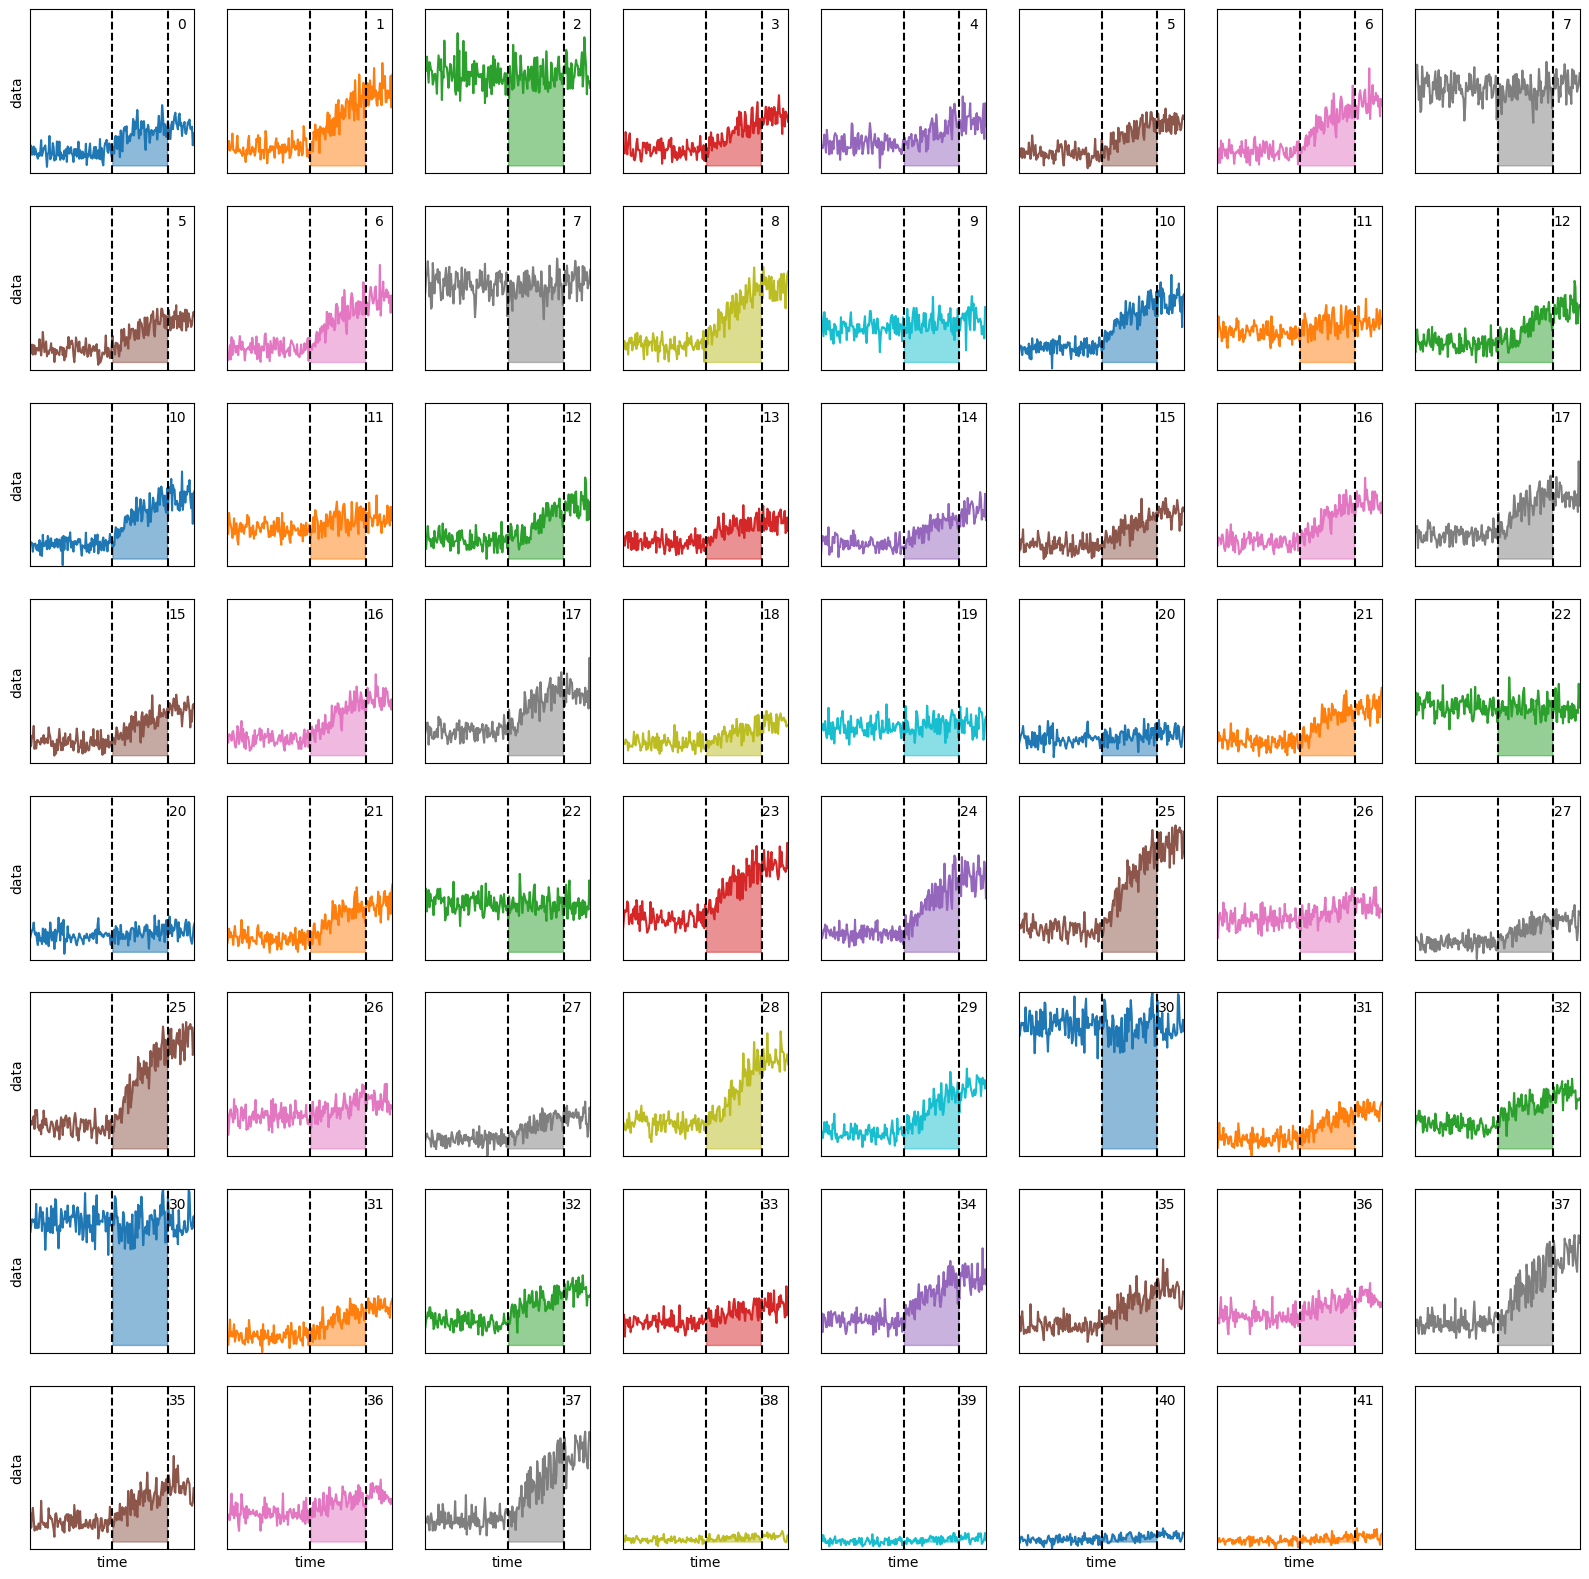

In [122]:
#repeat the above code for all columns in a 8x8 grid for only the last stimulus onset and 1 second before and after the stimulus onset using stim_on_frame[-1] and stim_offset_frame[-1]
fig, ax = plt.subplots(8, 8, figsize=(20, 20), sharex=True, sharey=True)
for i in range(8):
    for j in range(8):
        ax[i, j].plot(time_s[stim_on_frame[-1]-100:stim_on_frame[-1]+100], data_s[stim_on_frame[-1]-100:stim_on_frame[-1]+100,i*5+j], color='C{}'.format(i*5+j))
        ax[i, j].set_title('')
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].text(0.95, 0.95, '{}'.format(i*5+j), transform=ax[i, j].transAxes, horizontalalignment='right', verticalalignment='top')
        if i == 7:
            ax[i, j].set_xlabel('time')
        if j == 0:
            ax[i, j].set_ylabel('data')
        ax[i, j].axvline(x=time_s[stim_on_frame[-1]], color='k', linestyle='--')
        ax[i, j].axvline(x=time_s[stim_offset_frame[-1]], color='k', linestyle='--')
        ax[i, j].fill_between(time_s[stim_on_frame[-1]:stim_offset_frame[-1]], data_s[stim_on_frame[-1]:stim_offset_frame[-1],i*5+j], color='C{}'.format(i*5+j), alpha=0.5)
        ax[i, j].margins(x=0, y=0)
        ax[i, j].autoscale(enable=True, axis='x', tight=True)
        
        

IndexError: index 42 is out of bounds for axis 1 with size 42

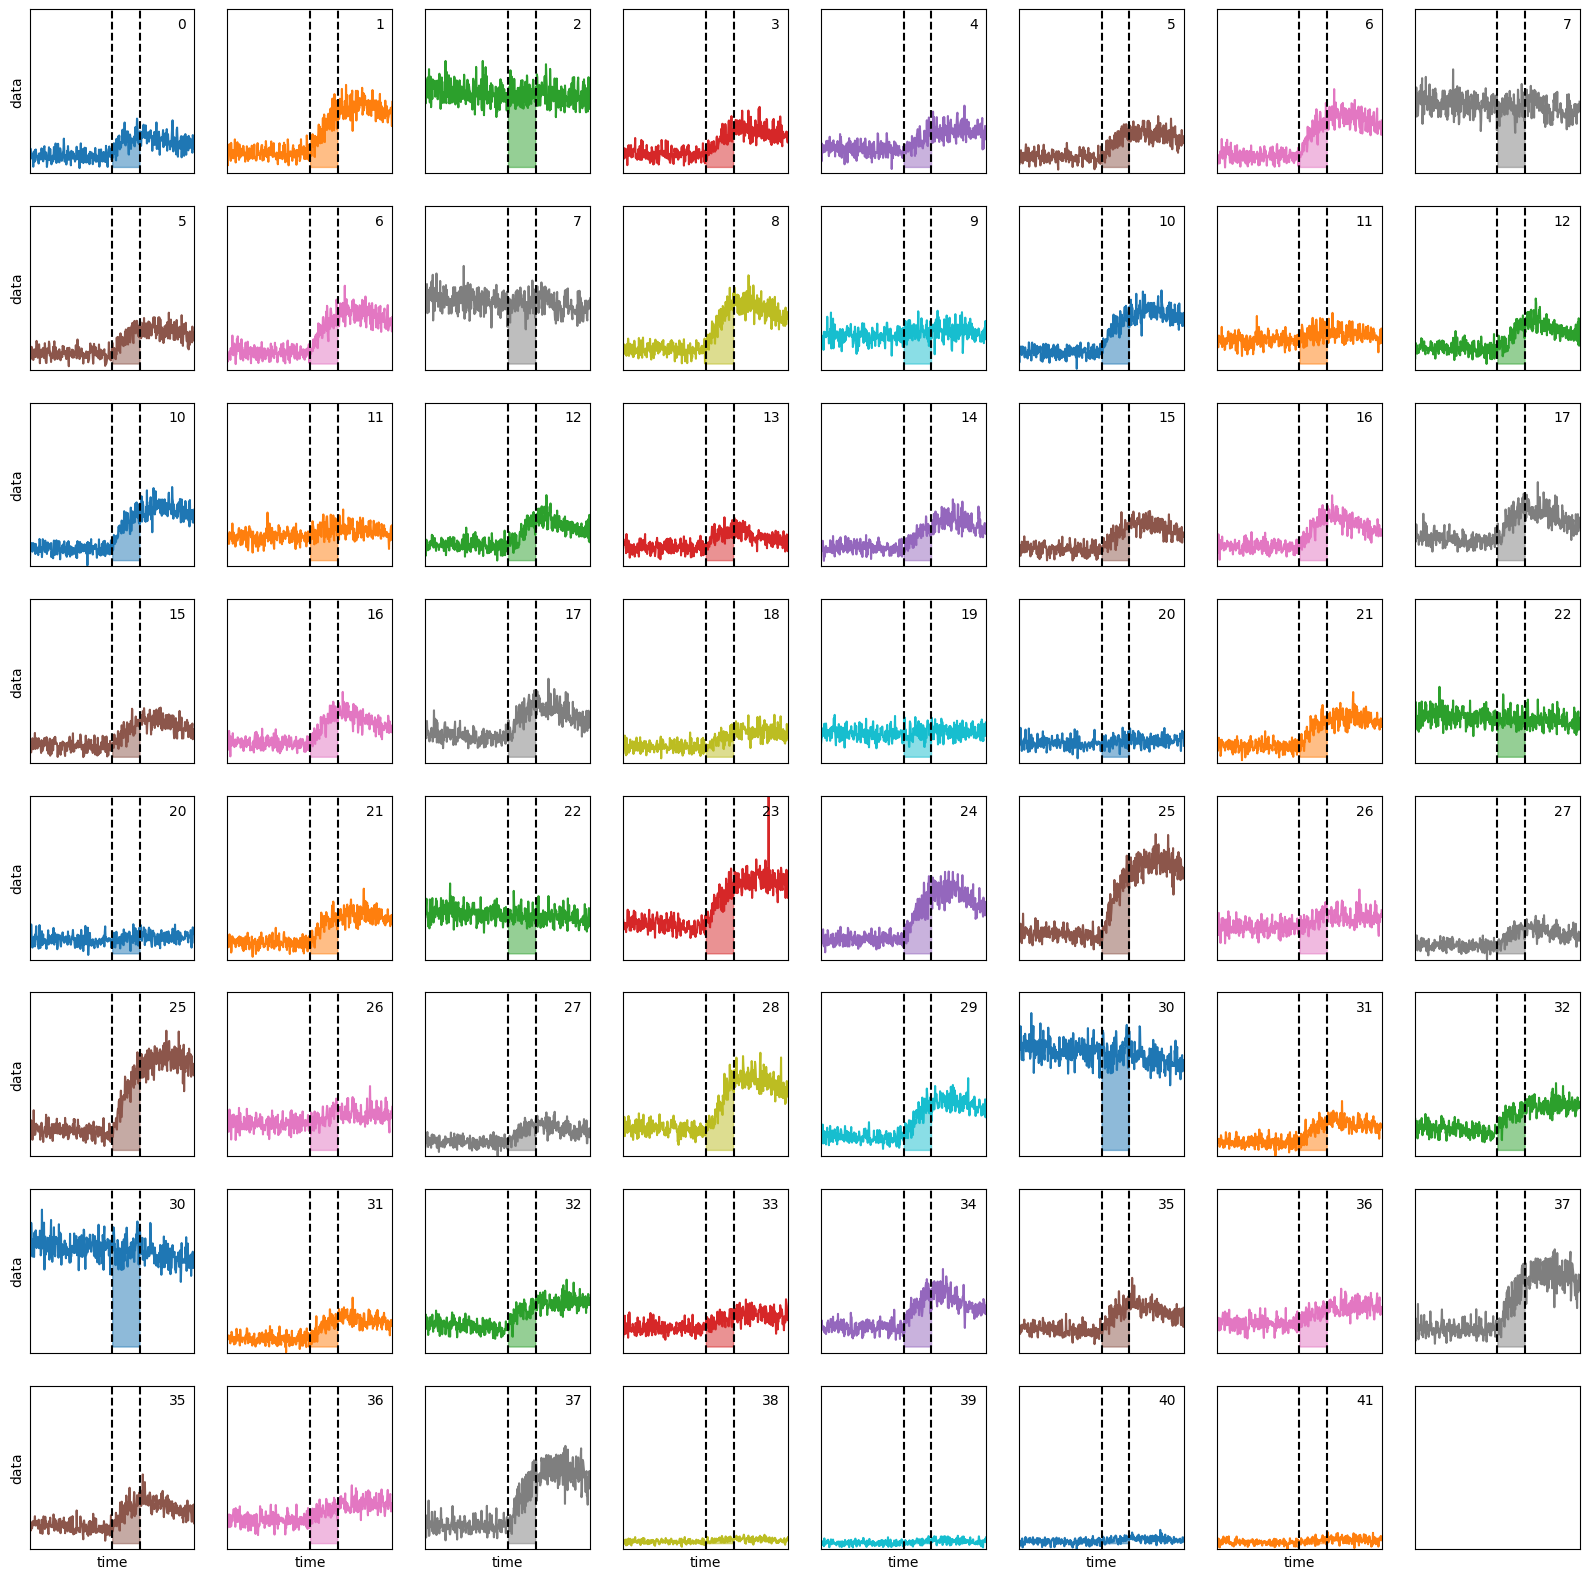

In [124]:
#repeat the above code for all columns in a 8x8 grid but extend the time window to 2 seconds before and after the stimulus onset using stim_on_frame[-1] and stim_offset_frame[-1]
fig, ax = plt.subplots(8, 8, figsize=(20, 20), sharex=True, sharey=True)
for i in range(8):
    for j in range(8):
        ax[i, j].plot(time_s[stim_on_frame[-1]-200:stim_on_frame[-1]+200], data_s[stim_on_frame[-1]-200:stim_on_frame[-1]+200,i*5+j], color='C{}'.format(i*5+j))
        ax[i, j].set_title('')
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].text(0.95, 0.95, '{}'.format(i*5+j), transform=ax[i, j].transAxes, horizontalalignment='right', verticalalignment='top')
        if i == 7:
            ax[i, j].set_xlabel('time')
        if j == 0:
            ax[i, j].set_ylabel('data')
        ax[i, j].axvline(x=time_s[stim_on_frame[-1]], color='k', linestyle='--')
        ax[i, j].axvline(x=time_s[stim_offset_frame[-1]], color='k', linestyle='--')
        ax[i, j].fill_between(time_s[stim_on_frame[-1]:stim_offset_frame[-1]], data_s[stim_on_frame[-1]:stim_offset_frame[-1],i*5+j], color='C{}'.format(i*5+j), alpha=0.5)
        ax[i, j].margins(x=0, y=0)
        ax[i, j].autoscale(enable=True, axis='x', tight=True)
        

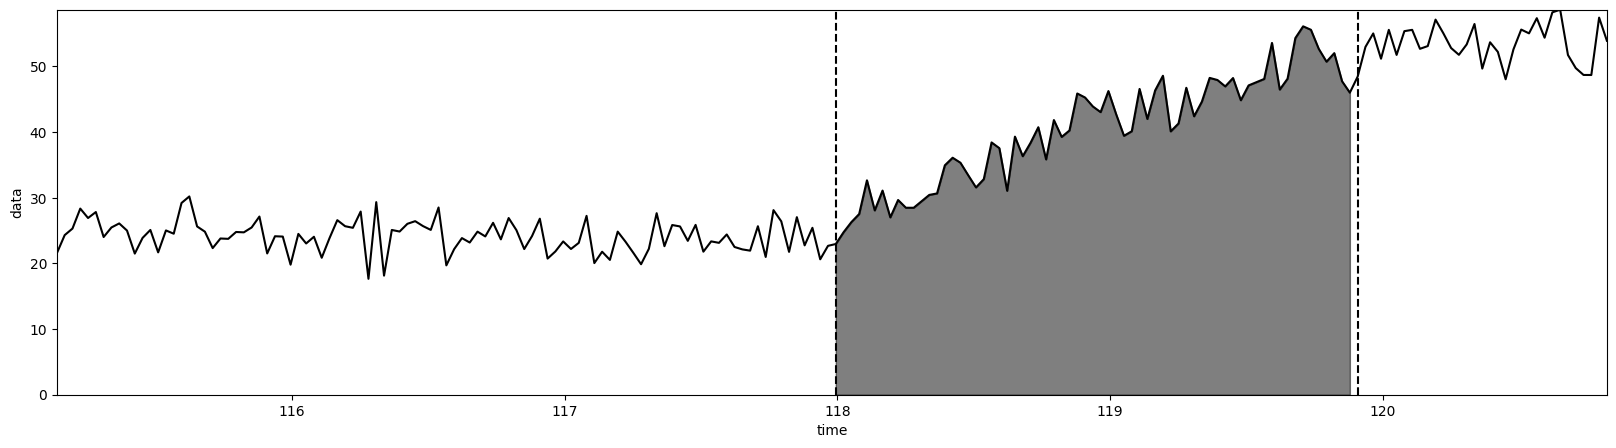

IndexError: index 42 is out of bounds for axis 1 with size 42

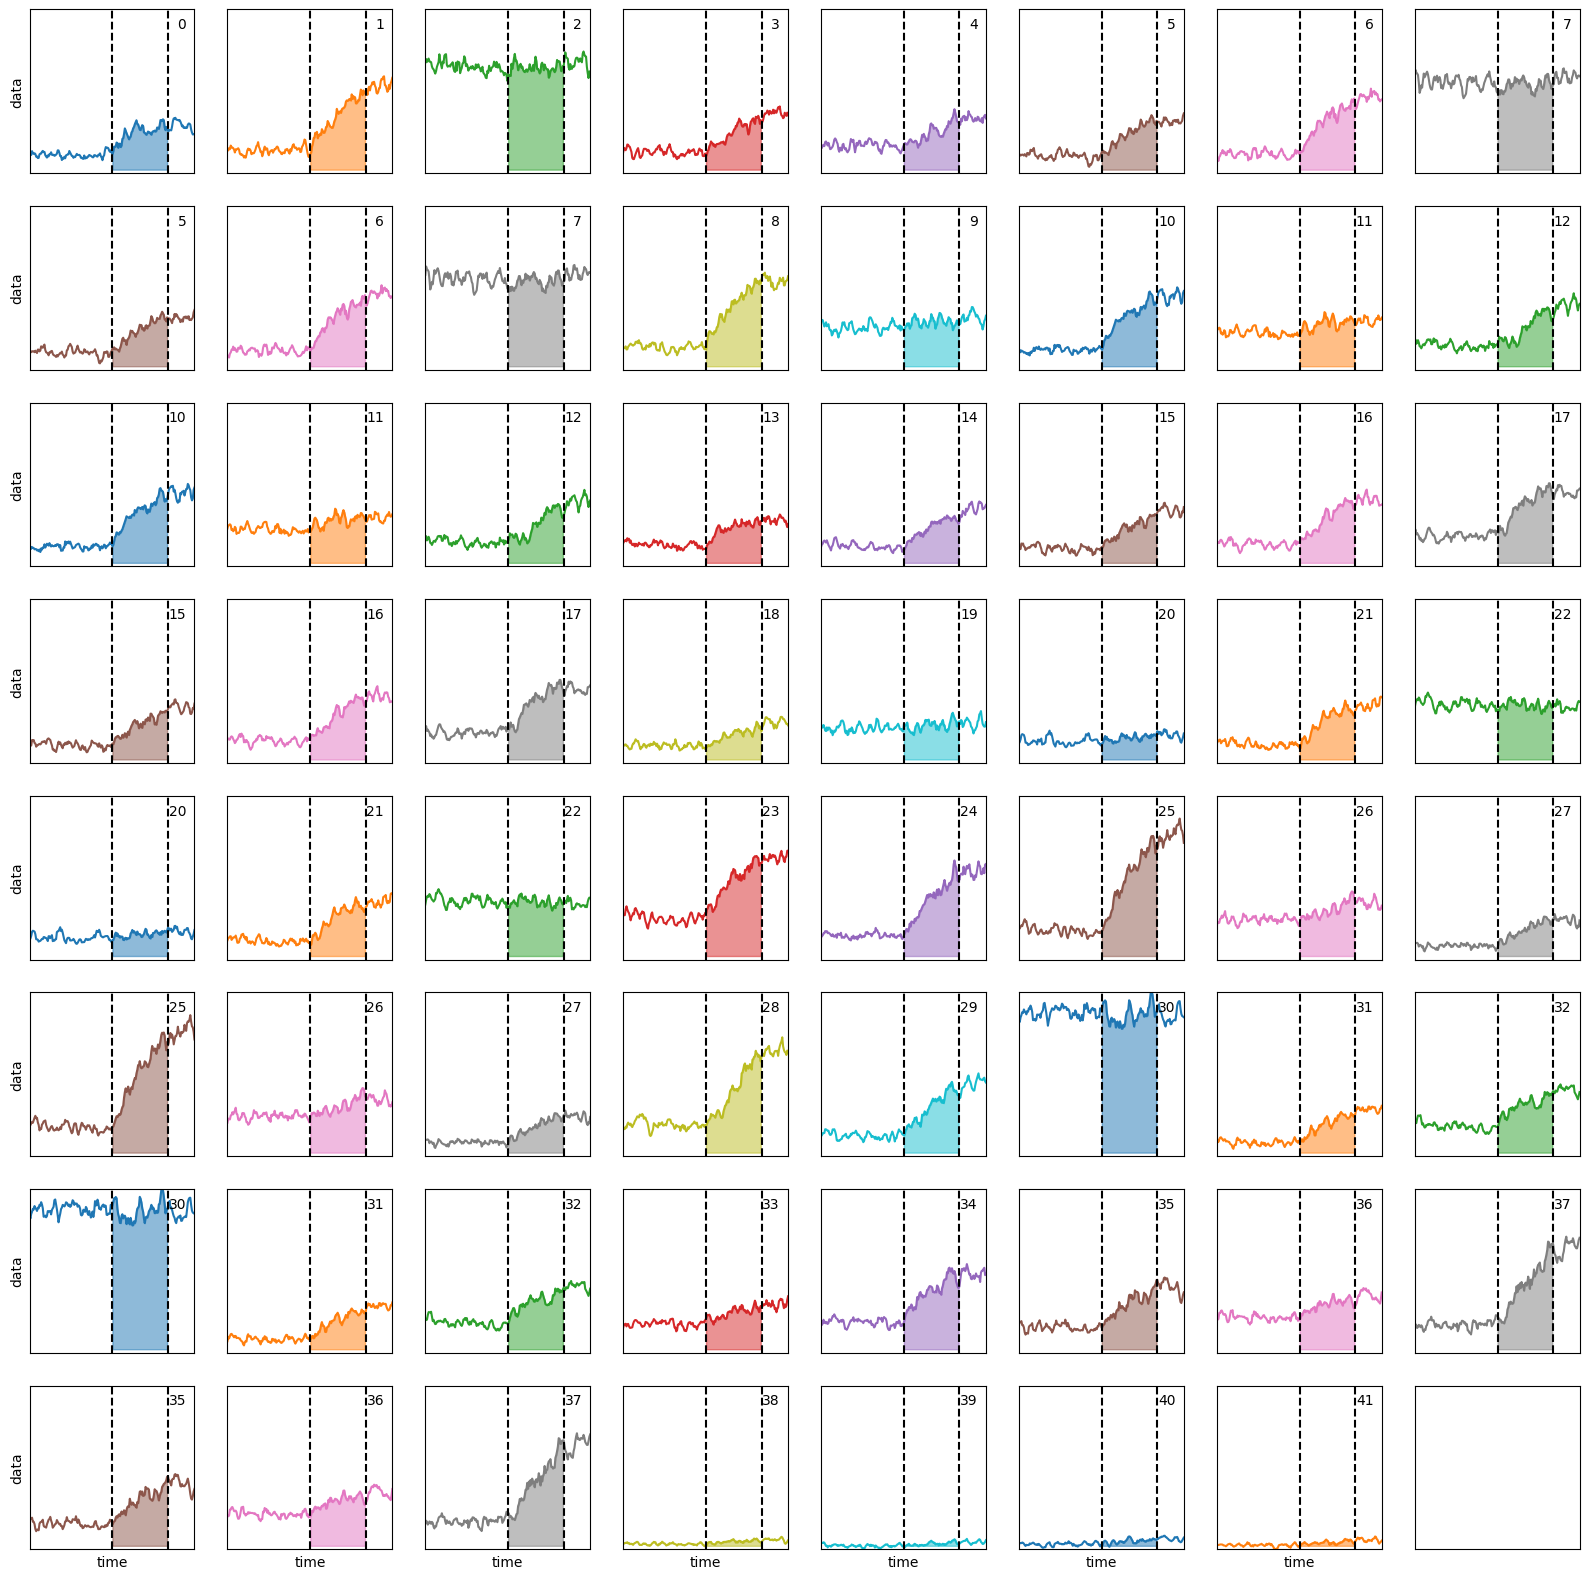

In [127]:
# in data_s, smooth the data using an exponential moving average with a window size of 5 frames
data_s_smooth = np.zeros(data_s.shape)
for i in range(data_s.shape[1]):
    data_s_smooth[:,i] = np.convolve(data_s[:,i], np.ones(5)/5, mode='same')
    
    #plot the smoothed data in a 8x8 grid for only the last stimulus onset and 1 second before and after the stimulus onset using stim_on_frame[-1] and stim_offset_frame[-1]
fig, ax = plt.subplots(8, 8, figsize=(20, 20), sharex=True, sharey=True)
for i in range(8):
    for j in range(8):
        ax[i, j].plot(time_s[stim_on_frame[-1]-100:stim_on_frame[-1]+100], data_s_smooth[stim_on_frame[-1]-100:stim_on_frame[-1]+100,i*5+j], color='C{}'.format(i*5+j))
        ax[i, j].set_title('')
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].text(0.95, 0.95, '{}'.format(i*5+j), transform=ax[i, j].transAxes, horizontalalignment='right', verticalalignment='top')
        if i == 7:
            ax[i, j].set_xlabel('time')
        if j == 0:
            ax[i, j].set_ylabel('data')
        ax[i, j].axvline(x=time_s[stim_on_frame[-1]], color='k', linestyle='--')
        ax[i, j].axvline(x=time_s[stim_offset_frame[-1]], color='k', linestyle='--')
        ax[i, j].fill_between(time_s[stim_on_frame[-1]:stim_offset_frame[-1]], data_s_smooth[stim_on_frame[-1]:stim_offset_frame[-1],i*5+j], color='C{}'.format(i*5+j), alpha=0.5)
        ax[i, j].margins(x=0, y=0)
        ax[i, j].autoscale(enable=True, axis='x', tight=True)
        


IndexError: index 42 is out of bounds for axis 1 with size 42

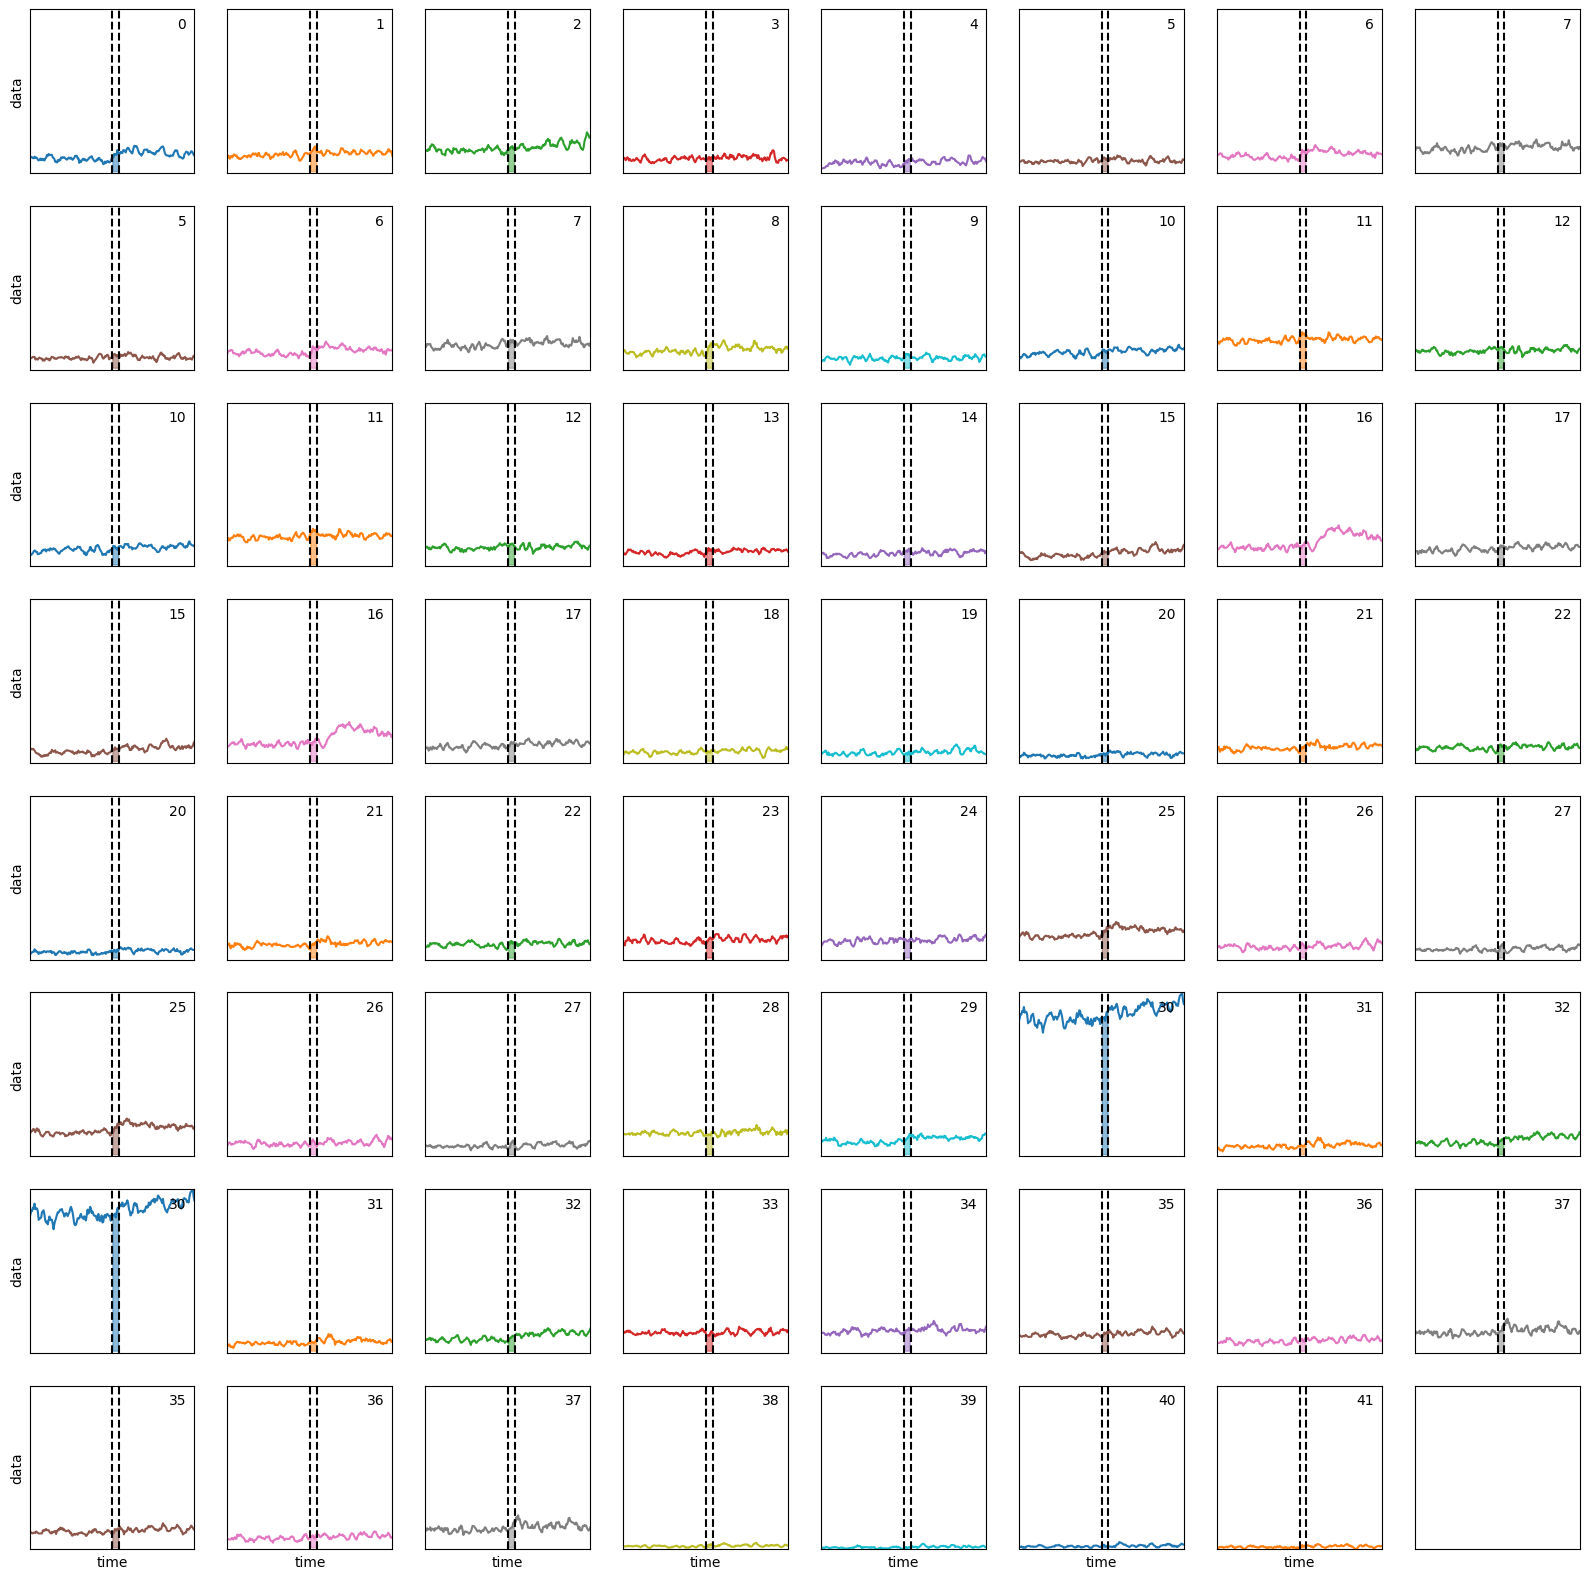

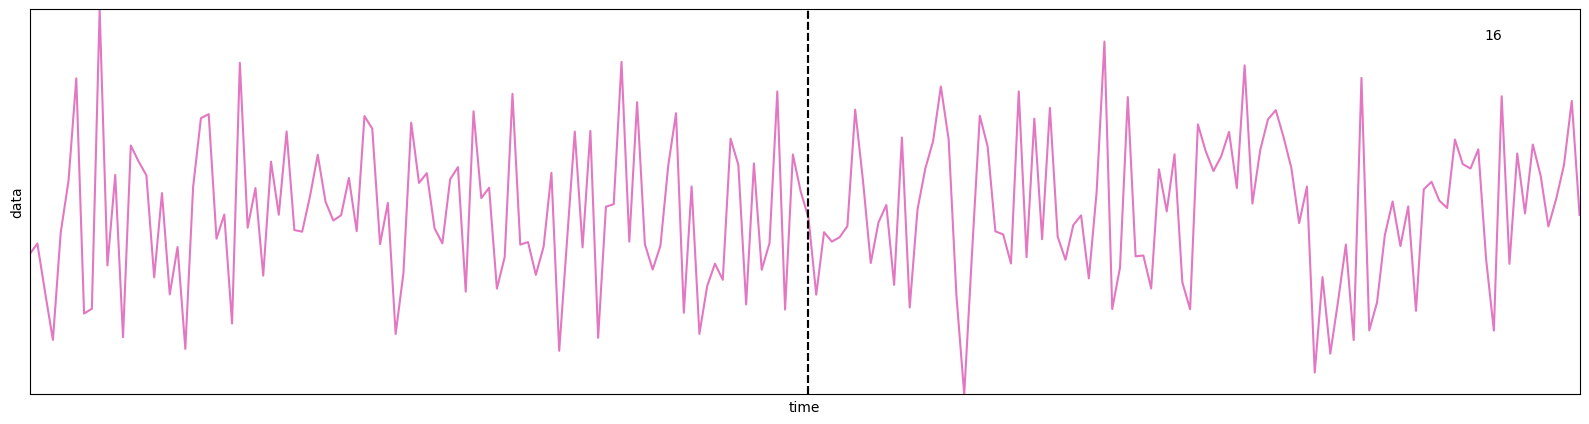

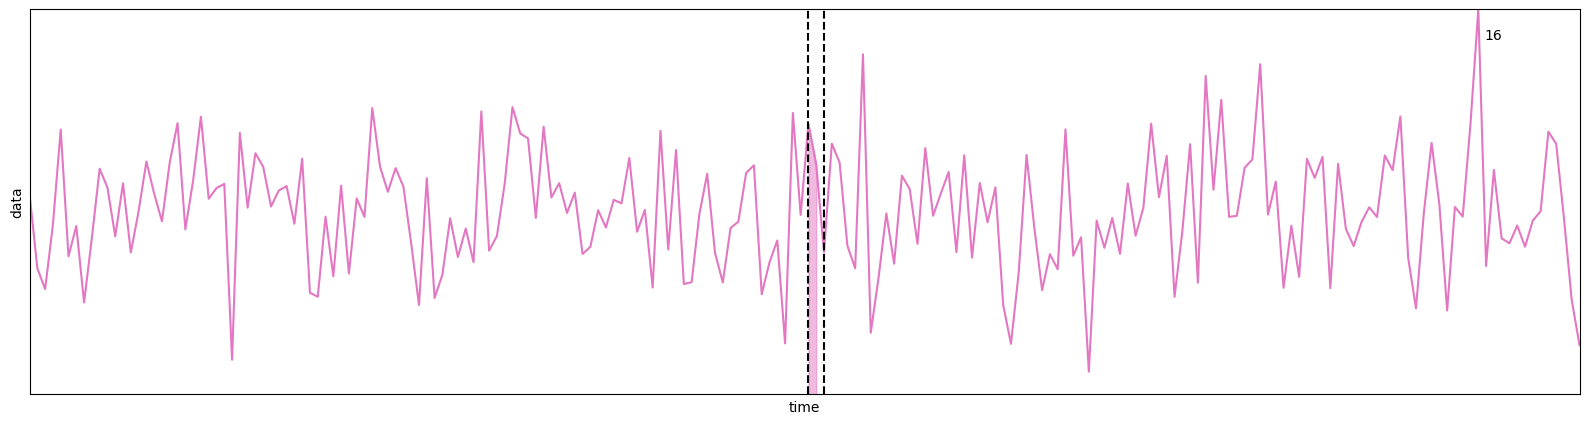

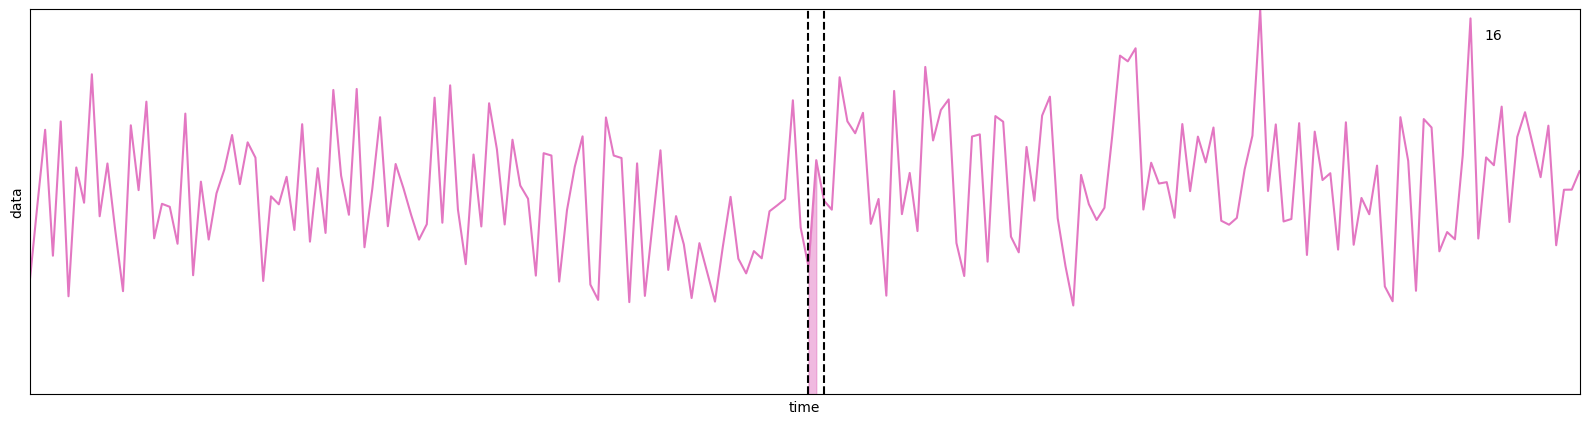

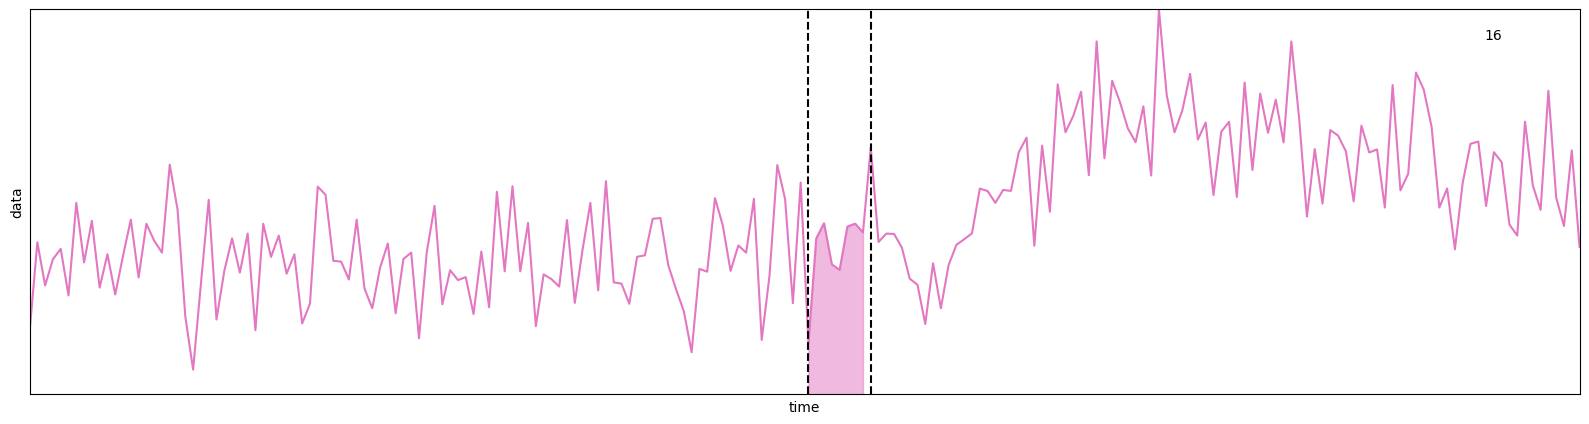

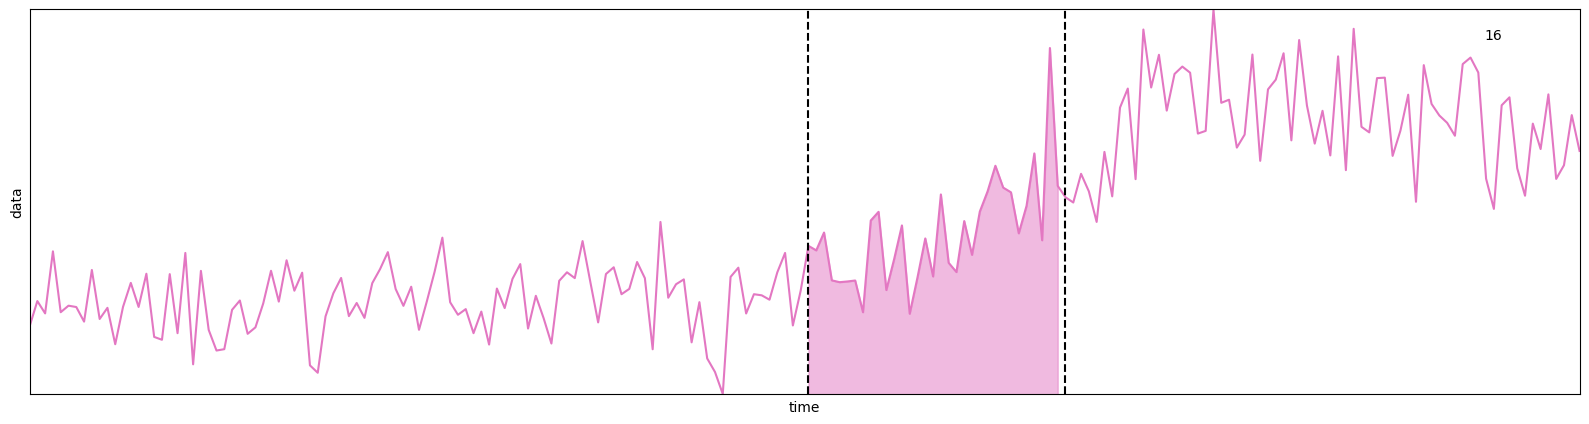

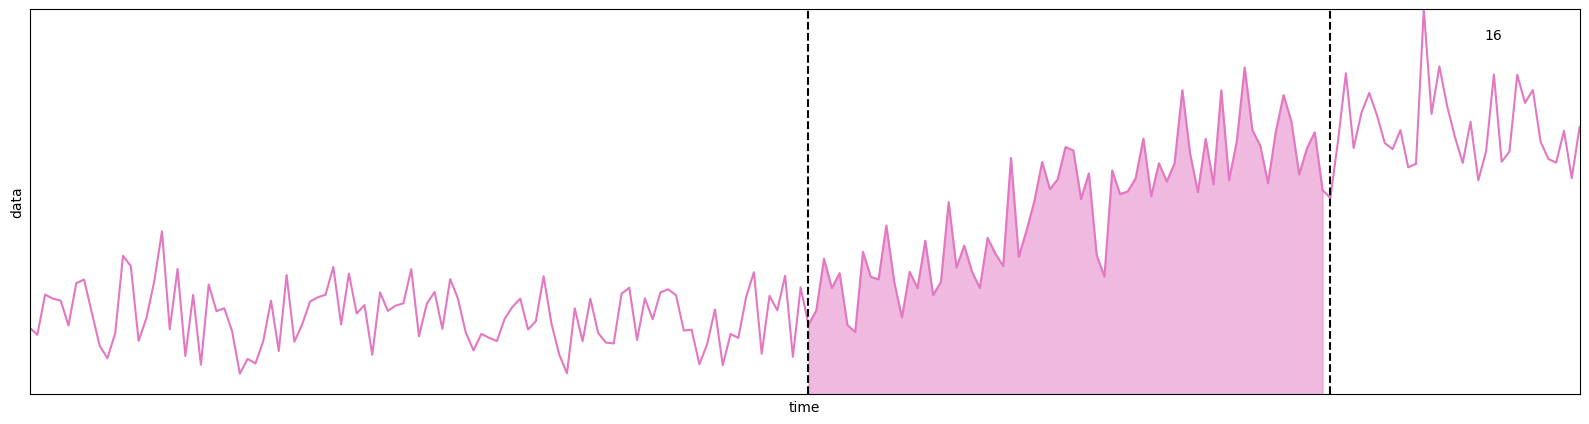

In [135]:
# plot the first stimulus onset and 1 second before and after the stimulus onset using stim_on_frame[0] and stim_offset_frame[0] with data_s 
# have the stimulus onset and offset marked with a vertical line
# fill the area between the stimulus onset and offset with a color
# plot column 16
fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharex=True, sharey=True)
ax.plot(time_s[stim_on_frame[0]-100:stim_on_frame[0]+100], data_s[stim_on_frame[0]-100:stim_on_frame[0]+100,16], color='C{}'.format(16))
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
ax.text(0.95, 0.95, '{}'.format(16), transform=ax.transAxes, horizontalalignment='right', verticalalignment='top')
ax.set_xlabel('time')
ax.set_ylabel('data')
ax.axvline(x=time_s[stim_on_frame[0]], color='k', linestyle='--')
ax.axvline(x=time_s[stim_offset_frame[0]], color='k', linestyle='--')
ax.fill_between(time_s[stim_on_frame[0]:stim_offset_frame[0]], data_s[stim_on_frame[0]:stim_offset_frame[0],16], color='C{}'.format(16), alpha=0.5)
ax.margins(x=0, y=0)
ax.autoscale(enable=True, axis='x', tight=True)

#now plot the second stimulation onset and 1 second before and after the stimulus onset using stim_on_frame[1] and stim_offset_frame[1] with data_s
# have the stimulus onset and offset marked with a vertical line
# fill the area between the stimulus onset and offset with a color
# plot column 16
fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharex=True, sharey=True)
ax.plot(time_s[stim_on_frame[1]-100:stim_on_frame[1]+100], data_s[stim_on_frame[1]-100:stim_on_frame[1]+100,16], color='C{}'.format(16))
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
ax.text(0.95, 0.95, '{}'.format(16), transform=ax.transAxes, horizontalalignment='right', verticalalignment='top')
ax.set_xlabel('time')
ax.set_ylabel('data')
ax.axvline(x=time_s[stim_on_frame[1]], color='k', linestyle='--')
ax.axvline(x=time_s[stim_offset_frame[1]], color='k', linestyle='--')
ax.fill_between(time_s[stim_on_frame[1]:stim_offset_frame[1]], data_s[stim_on_frame[1]:stim_offset_frame[1],16], color='C{}'.format(16), alpha=0.5)
ax.margins(x=0, y=0)
ax.autoscale(enable=True, axis='x', tight=True)

#now plot the third stimulation onset and 1 second before and after the stimulus onset using stim_on_frame[2] and stim_offset_frame[2] with data_s
# have the stimulus onset and offset marked with a vertical line
# fill the area between the stimulus onset and offset with a color
# plot column 16
fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharex=True, sharey=True)
ax.plot(time_s[stim_on_frame[2]-100:stim_on_frame[2]+100], data_s[stim_on_frame[2]-100:stim_on_frame[2]+100,16], color='C{}'.format(16))
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
ax.text(0.95, 0.95, '{}'.format(16), transform=ax.transAxes, horizontalalignment='right', verticalalignment='top')
ax.set_xlabel('time')
ax.set_ylabel('data')
ax.axvline(x=time_s[stim_on_frame[2]], color='k', linestyle='--')
ax.axvline(x=time_s[stim_offset_frame[2]], color='k', linestyle='--')
ax.fill_between(time_s[stim_on_frame[2]:stim_offset_frame[2]], data_s[stim_on_frame[2]:stim_offset_frame[2],16], color='C{}'.format(16), alpha=0.5)
ax.margins(x=0, y=0)
ax.autoscale(enable=True, axis='x', tight=True)

#now plot the fourth stimulation onset and 1 second before and after the stimulus onset using stim_on_frame[3] and stim_offset_frame[3] with data_s
# have the stimulus onset and offset marked with a vertical line
# fill the area between the stimulus onset and offset with a color
# plot column 16
fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharex=True, sharey=True)
ax.plot(time_s[stim_on_frame[3]-100:stim_on_frame[3]+100], data_s[stim_on_frame[3]-100:stim_on_frame[3]+100,16], color='C{}'.format(16))
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
ax.text(0.95, 0.95, '{}'.format(16), transform=ax.transAxes, horizontalalignment='right', verticalalignment='top')
ax.set_xlabel('time')
ax.set_ylabel('data')
ax.axvline(x=time_s[stim_on_frame[3]], color='k', linestyle='--')
ax.axvline(x=time_s[stim_offset_frame[3]], color='k', linestyle='--')
ax.fill_between(time_s[stim_on_frame[3]:stim_offset_frame[3]], data_s[stim_on_frame[3]:stim_offset_frame[3],16], color='C{}'.format(16), alpha=0.5)
ax.margins(x=0, y=0)
ax.autoscale(enable=True, axis='x', tight=True)

#now plot the fifth stimulation onset and 1 second before and after the stimulus onset using stim_on_frame[4] and stim_offset_frame[4] with data_s
# have the stimulus onset and offset marked with a vertical line
# fill the area between the stimulus onset and offset with a color
# plot column 16
fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharex=True, sharey=True)
ax.plot(time_s[stim_on_frame[4]-100:stim_on_frame[4]+100], data_s[stim_on_frame[4]-100:stim_on_frame[4]+100,16], color='C{}'.format(16))
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
ax.text(0.95, 0.95, '{}'.format(16), transform=ax.transAxes, horizontalalignment='right', verticalalignment='top')
ax.set_xlabel('time')
ax.set_ylabel('data')
ax.axvline(x=time_s[stim_on_frame[4]], color='k', linestyle='--')
ax.axvline(x=time_s[stim_offset_frame[4]], color='k', linestyle='--')
ax.fill_between(time_s[stim_on_frame[4]:stim_offset_frame[4]], data_s[stim_on_frame[4]:stim_offset_frame[4],16], color='C{}'.format(16), alpha=0.5)
ax.margins(x=0, y=0)
ax.autoscale(enable=True, axis='x', tight=True)

#now plot the sixth stimulation onset and 1 second before and after the stimulus onset using stim_on_frame[5] and stim_offset_frame[5] with data_s
# have the stimulus onset and offset marked with a vertical line
# fill the area between the stimulus onset and offset with a color
# plot column 16
fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharex=True, sharey=True)
ax.plot(time_s[stim_on_frame[5]-100:stim_on_frame[5]+100], data_s[stim_on_frame[5]-100:stim_on_frame[5]+100,16], color='C{}'.format(16))
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
ax.text(0.95, 0.95, '{}'.format(16), transform=ax.transAxes, horizontalalignment='right', verticalalignment='top')
ax.set_xlabel('time')
ax.set_ylabel('data')
ax.axvline(x=time_s[stim_on_frame[5]], color='k', linestyle='--')
ax.axvline(x=time_s[stim_offset_frame[5]], color='k', linestyle='--')
ax.fill_between(time_s[stim_on_frame[5]:stim_offset_frame[5]], data_s[stim_on_frame[5]:stim_offset_frame[5],16], color='C{}'.format(16), alpha=0.5)
ax.margins(x=0, y=0)
ax.autoscale(enable=True, axis='x', tight=True)
    

